# Human Activity Recognition example
Aerobic actions were recorded from subjects using the Inertial Measurement Unit (IMU) on an Apple iPhone 4 smartphone. The IMU includes a 3D accelerometer, gyroscope, and magnetometer. Each sample was taken at 60Hz, and manually trimmed to 500 samples (8.33s) to eliminate starting and stopping movements. The iPhone was always clipped to the belt on the right hand side.

Each file contains 500 rows each with the following information:
Acc_x, Acc_y, Acc_z, Gyr_x, Gyr_y, Gyr_z, Mag_x, Mag_y, Mag_z.

In [1]:
import numpy as np
import pandas as pd
import mogptk

# MOGP prediction on the sensor values
We use each of the nine sensor's values as channel, leaving us with nine channels to fit using multi output Gaussian processes in order to find cross correlations between the channels.

## Example 1: cycling
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is in a bike.

In [2]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S05/bike3.csv', header=None)

y = df.values
t = (np.arange(0, 500) / 60)

In [3]:
cols = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z', 'Mag_x', 'Mag_y', 'Mag_z']

data = mogptk.DataSet()
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

### Simulate sensor failure

In [4]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

data.transform(mogptk.TransformDetrend())

### Create model 

In [5]:
model = mogptk.MOSM(data, Q=3)
model.init_parameters('BNSE')

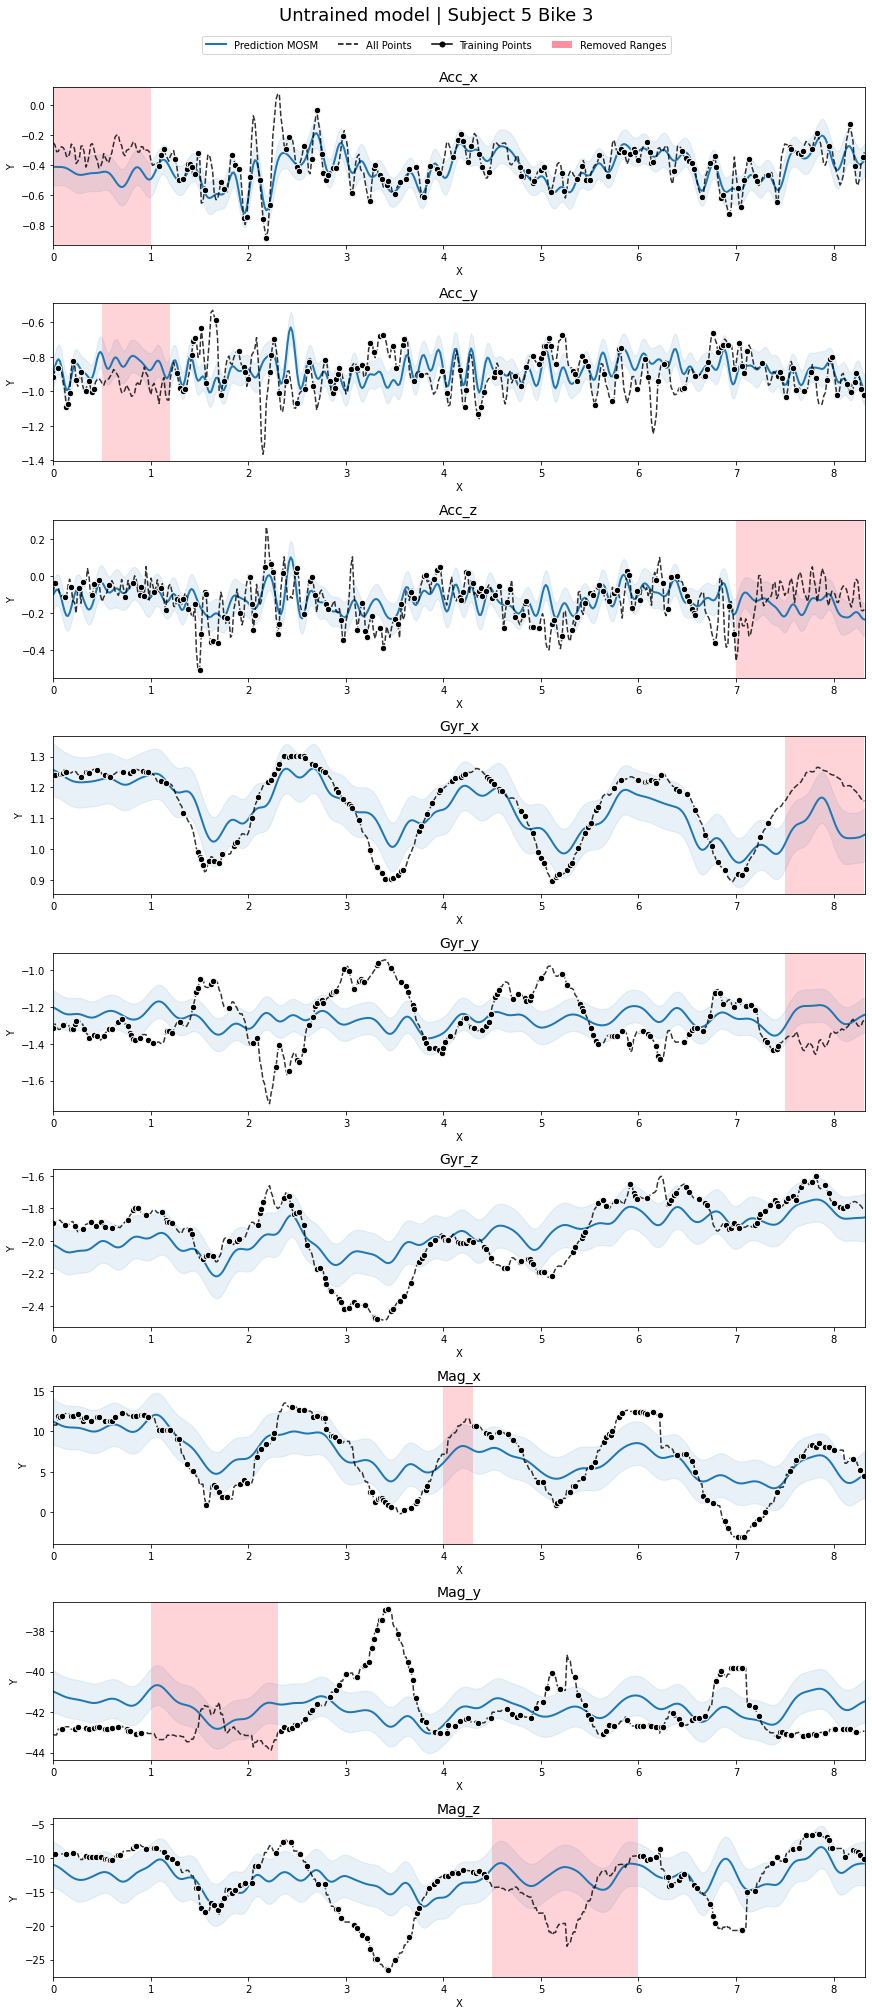

In [6]:
model.predict()
data.plot(title='Untrained model | Subject 5 Bike 3');

### Model training

In [7]:
model.train(verbose=True)


Starting optimization using Adam
‣ Model: MOSM
‣ Channels: 9
‣ Mixtures: 3
‣ Training points: 1201
‣ Parameters: 162
‣ Initial NLL: 2.501

Optimization finished in 12.95 minutes
‣ Function evaluations: 500
‣ Final NLL: -1.051


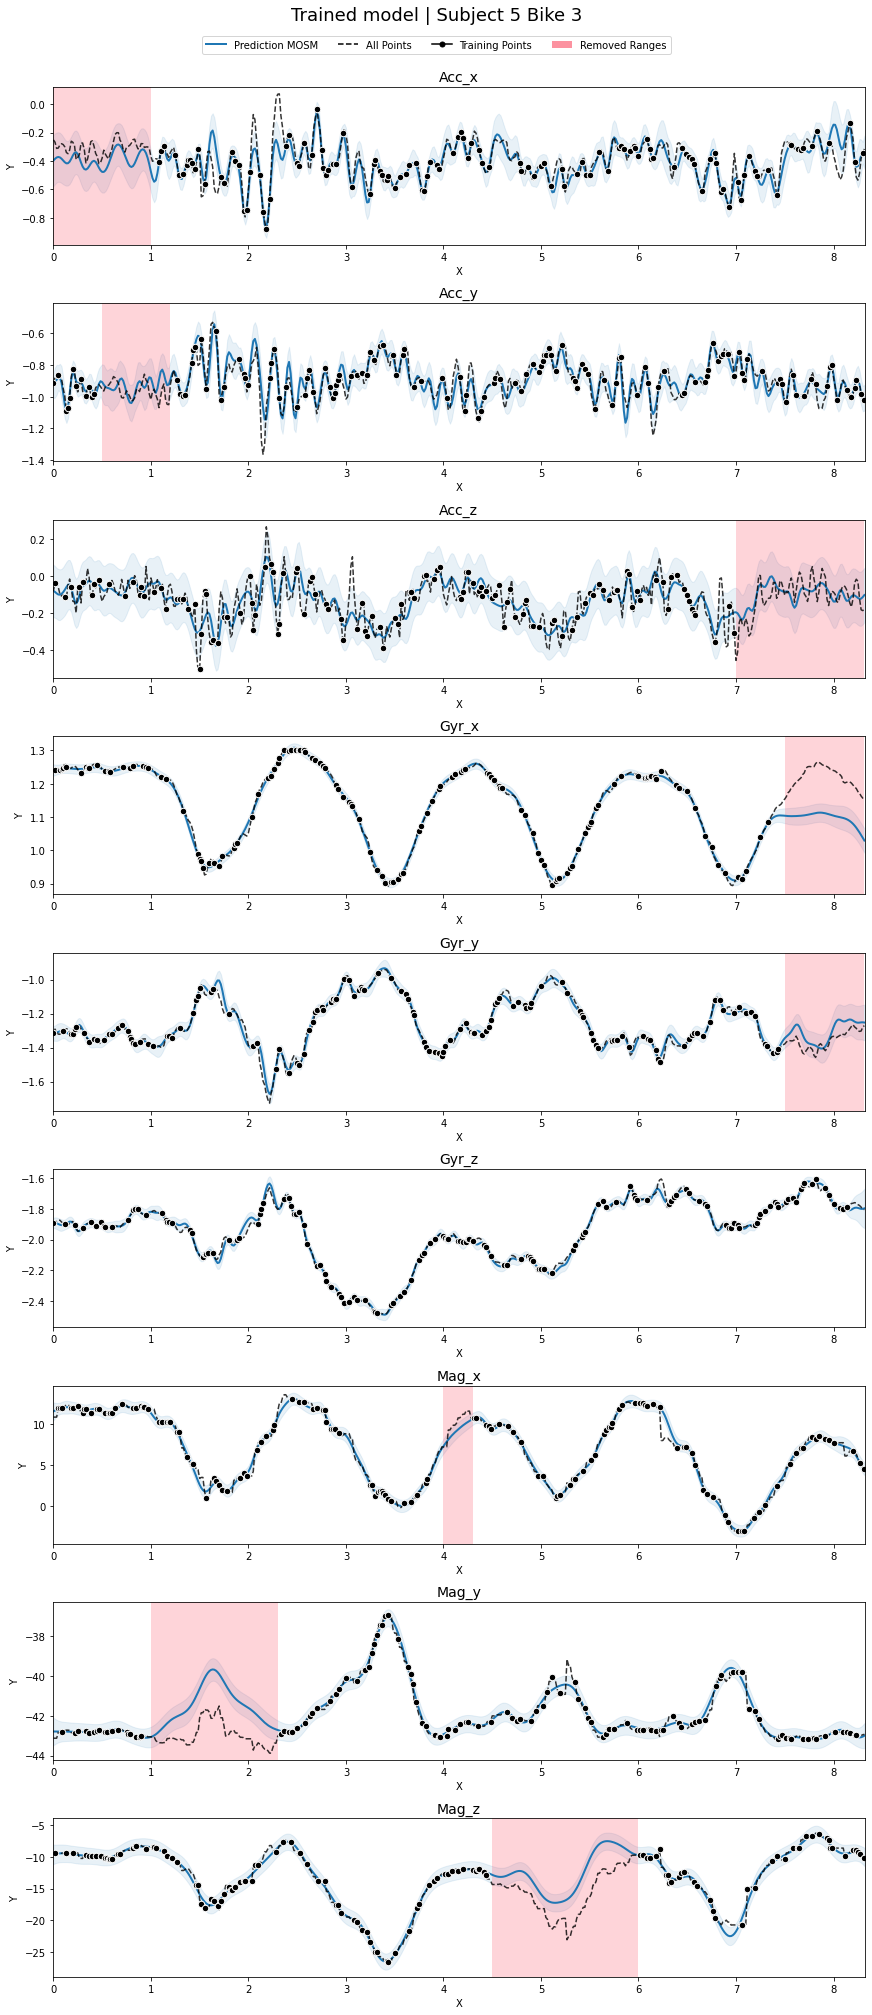

In [8]:
model.predict()
data.plot(title='Trained model | Subject 5 Bike 3');

## Example 2: walking
Example consisting of measurement for the 9 sensors at 60Hz, with 500 samples per channel, while the person is walking.

In [9]:
df = pd.read_csv('data/HAR/Smartphone_Dataset/S01/walking2.csv', header=None)

y = df.values
t = np.arange(0, 500) / 60

data = mogptk.DataSet()
for i in range(9):
    data.append(mogptk.Data(t, y[:, i], name=cols[i]))

In [10]:
# randomly sample from the data
for channel in data:
    channel.remove_randomly(pct=0.7)
    
# drop chunks to simulate sensor failure
data[0].remove_range(None, 1)
data[1].remove_range(0.5, 1.2)
data[2].remove_range(7, None)
data[3].remove_range(7.5, None)
data[4].remove_range(7.5, None)
data[6].remove_range(4, 4.3)
data[7].remove_range(1, 2.3)
data[8].remove_range(4.5, 6)

data.transform(mogptk.TransformDetrend())

In [11]:
model = mogptk.MOSM(data, Q=3)
model.init_parameters('BNSE')
model.train(verbose=True)


Starting optimization using Adam
‣ Model: MOSM
‣ Channels: 9
‣ Mixtures: 3
‣ Training points: 1225
‣ Parameters: 162
‣ Initial NLL: 2.322

Optimization finished in 13.08 minutes
‣ Function evaluations: 500
‣ Final NLL: -0.442


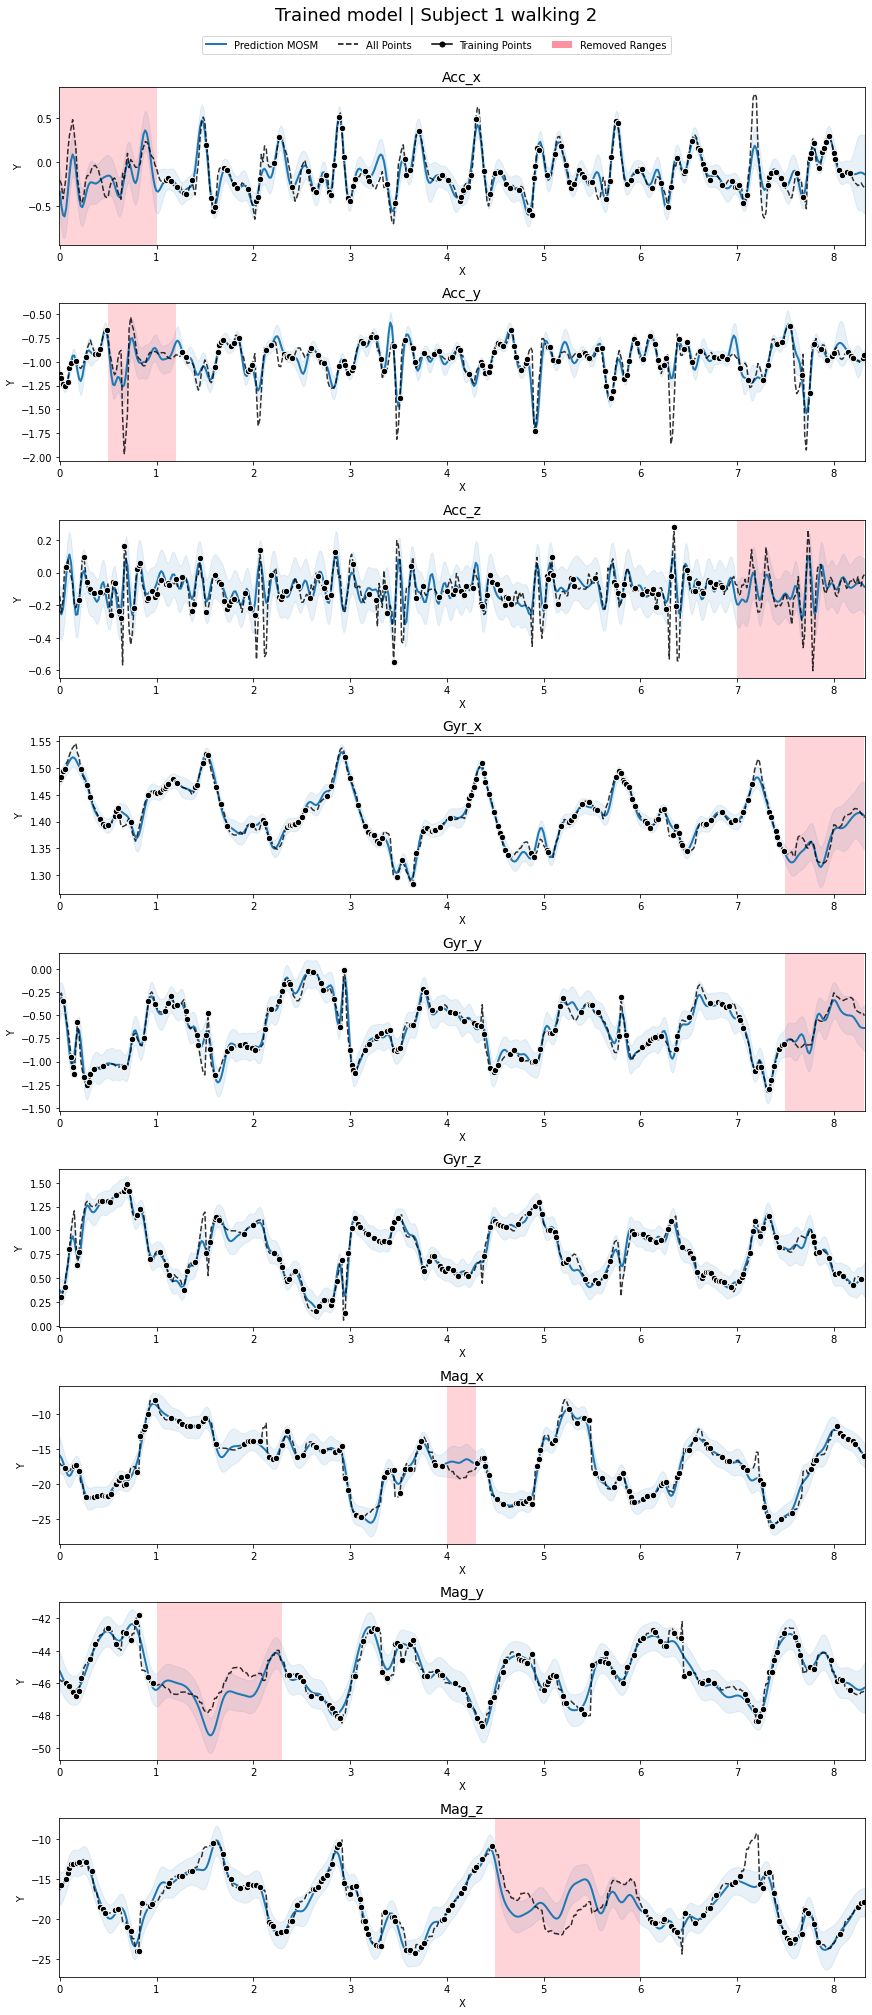

In [12]:
model.predict()
data.plot(title='Trained model | Subject 1 walking 2');